## Lake Zug CTD Transect Planning (30/10/2025)

Select 8-12 profile locations.

In [5]:
# imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

In [2]:
# planned locations
profile_locs = pd.DataFrame({
    'loc': [f'P{x}' for x in range(1, 13)],
    'xsc': [679803, 679803, 679663, 679415, 679505, 680030, 680150, 680223, 680409, 680814, 681350, 681909],
    'ysc': [224100, 222690, 221650, 220433, 219544, 218872, 218462, 218126, 217437, 216239, 214957, 213760]
})

profile_locs['xsc'] += int(2e6)
profile_locs['ysc'] += int(1e6)

profile_locs

,loc,xsc,ysc
0,P1,2679803,1224100
1,P2,2679803,1222690
2,P3,2679663,1221650
3,P4,2679415,1220433
4,P5,2679505,1219544
5,P6,2680030,1218872
6,P7,2680150,1218462
7,P8,2680223,1218126
8,P9,2680409,1217437
9,P10,2680814,1216239


In [3]:
# Lake Zug bathymetry
bathy = xr.open_dataset('../../../data/lake_zug/bathymetry/zugersee_bathy.nc')

In [26]:
md_file = '../../../data/lake_zug/ctd/20251030_CTD/md.json'
with open(md_file, 'r') as f:
    md = json.load(f)

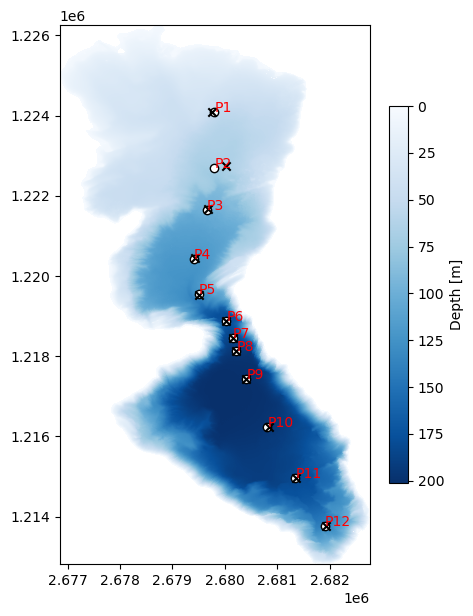

In [35]:
fig, ax = plt.subplots(figsize=(5, 7))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# planned locations
for _, row in profile_locs.iterrows():
    ax.scatter(row.xsc, row.ysc, c='white', edgecolor='black')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='red')

# sampled locations
for p in md['profiles']:
    ax.scatter(p['x_coordinate'] + 2e6, p['y_coordinate'] + 1e6, c='black', marker='x')

plt.show()